In [46]:
# Import Libraries
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance

In [47]:
# Getting data from yahoo finance
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)
# Using COIN ticker for Coinbase stock 
ticker = 'COIN'
# Downloading data from Yahoo Fianance
data = yf.download(ticker, start=start_date, end=end_date)
# Converting downloaded data into dataframe
df = pd.DataFrame(data)
# Reset and set date as index column
df.reset_index(inplace=True)
df.set_index('Date', inplace=True)

# Display first 10 rows of dataframe
df.head(10)
len(df)

[*********************100%%**********************]  1 of 1 completed


793

In [48]:
# Check for null values
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [49]:
# Check duplicate data entry if any
df.index.duplicated(keep=False).sum()

0

In [50]:
# Descriptive Stats of data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,793.000000,793.000000,793.000000,793.000000,793.000000,7.930000e+02
mean,146.450290,151.157919,141.746570,146.281816,146.281816,1.117232e+07
std,88.751060,90.702005,86.394796,88.332113,88.332113,8.562882e+06
min,32.580002,33.480000,31.549999,32.529999,32.529999,1.574700e+06
25%,66.199997,69.400002,63.119999,66.379997,66.379997,5.366400e+06
50%,121.099998,124.820000,114.510002,121.010002,121.010002,9.349300e+06
75%,231.059998,237.360001,226.130005,230.869995,230.869995,1.411280e+07
max,381.000000,429.540009,345.559998,357.390015,357.390015,8.106570e+07


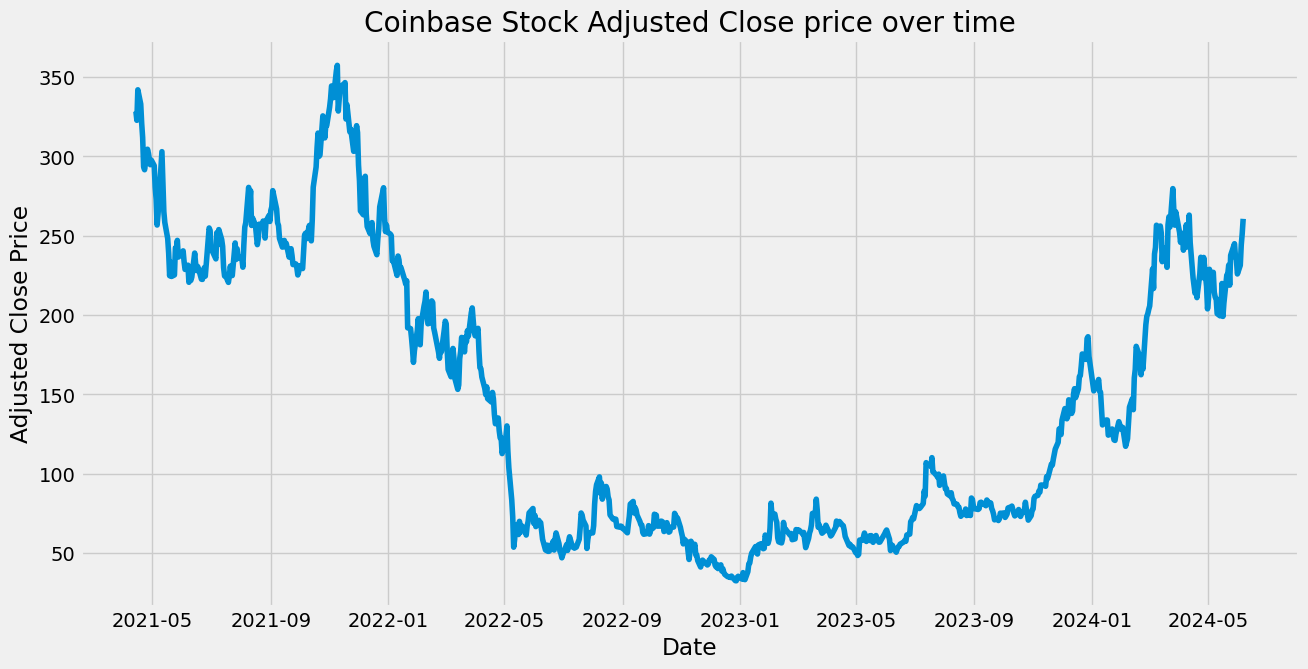

In [51]:
# Line plot of Adjusted Close price over Time
# Theme for plots
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14,7))
plt.plot(df.index, df['Adj Close'])
plt.title('Coinbase Stock Adjusted Close price over time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.grid(True)
plt.show()

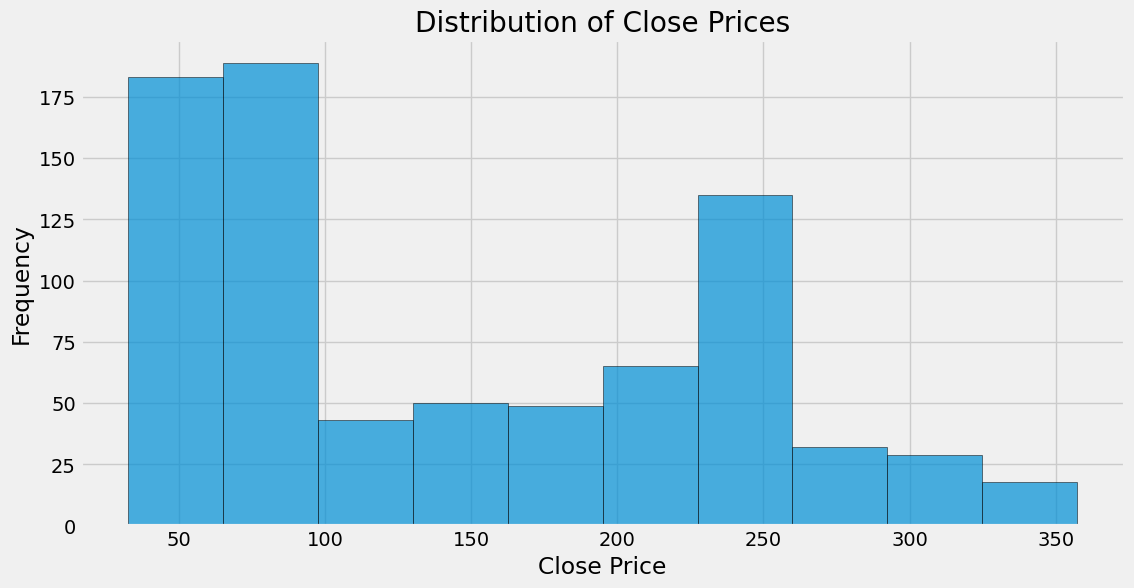

In [52]:
# Plotting frequency of adjusted close price 
plt.figure(figsize=(12, 6))
plt.hist(df['Adj Close'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

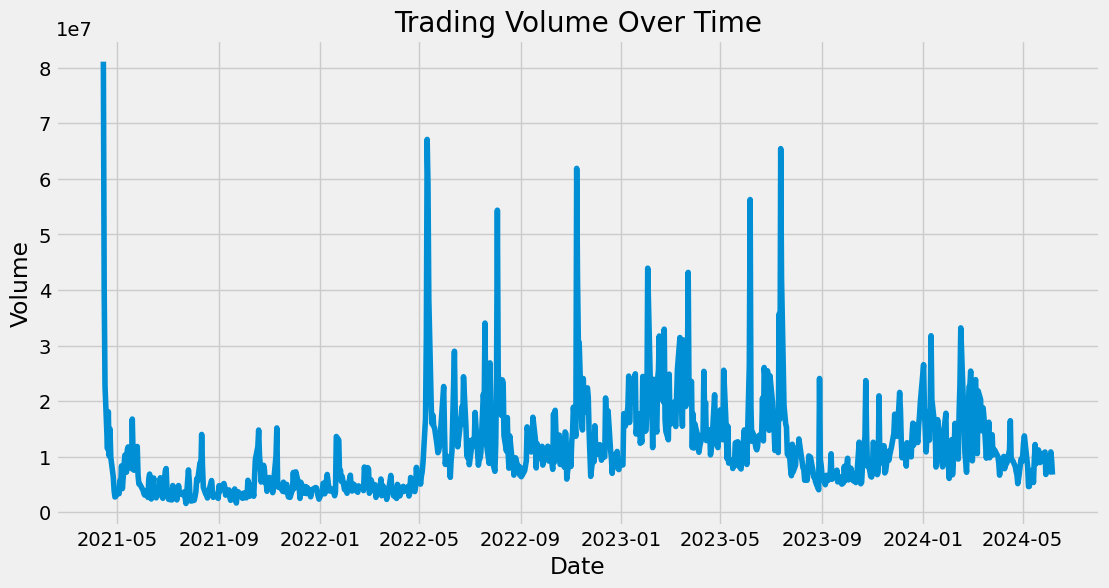

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volume'])
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

In [54]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998717,0.998464,0.996831,0.996831,-0.375552
High,0.998717,1.000000,0.997945,0.998165,0.998165,-0.357359
Low,0.998464,0.997945,1.000000,0.998791,0.998791,-0.392566
Close,0.996831,0.998165,0.998791,1.000000,1.000000,-0.379444
Adj Close,0.996831,0.998165,0.998791,1.000000,1.000000,-0.379444
Volume,-0.375552,-0.357359,-0.392566,-0.379444,-0.379444,1.000000


In [55]:
# Calculate percentage returns and log percentage returns
df['Pct_Returns'] = df['Adj Close'].pct_change()
df['Log_Pct_Returns'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
df

,Open,High,Low,Close,Adj Close,Volume,Pct_Returns,Log_Pct_Returns
Date,,,,,,,,
2021-04-14,381.000000,429.540009,310.000000,328.279999,328.279999,81065700,NaN,NaN
2021-04-15,348.899994,349.200012,317.269989,322.750000,322.750000,39777900,-0.016845,-0.016989
2021-04-16,327.500000,345.989990,321.029999,342.000000,342.000000,22654500,0.059644,0.057933
2021-04-19,337.260010,341.010010,326.790009,333.000000,333.000000,11405600,-0.026316,-0.026668
2021-04-20,333.429993,334.829987,312.019989,320.820007,320.820007,18082300,-0.036577,-0.037262
...,...,...,...,...,...,...,...,...
2024-05-31,239.279999,240.410004,219.169998,225.919998,225.919998,10123100,-0.037655,-0.038383
2024-06-03,232.500000,239.199997,224.690002,231.389999,231.389999,7333100,0.024212,0.023924
2024-06-04,230.229996,247.199997,230.160004,244.199997,244.199997,10854300,0.055361,0.053883


In [56]:
# Moving Averages

# Simple Moving Averages
df['SMA_5'] = df['Adj Close'].rolling(window=10).mean()
df['SMA_10'] = df['Adj Close'].rolling(window=10).mean()
df['SMA_20'] = df['Adj Close'].rolling(window=20).mean()
df['SMA_50'] = df['Adj Close'].rolling(window=50).mean()

# Exponential Moving Average
df['EMA_50'] = df['Adj Close'].ewm(span=50,adjust=False).mean()

# Relative Strength Index (RSI)
window_length = 14
delta = df['Adj Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=window_length).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window_length).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

# Moving Average Convergence Divergence (MACD)
df['MACD'] = df['Adj Close'].ewm(span=12, adjust=False).mean() - df['Adj Close'].ewm(span=26, adjust=False).mean()
df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
df['MACD_hist'] = df['MACD'] - df['MACD_signal']

# Shift
df['Pct_Returns_1'] = df['Pct_Returns'].shift(1)
df['Log_Pct_Returns_1'] = df['Log_Pct_Returns'].shift(1)
df['Volume_1'] = df['Volume'].shift(1)
df['Open_1'] = df['Open'].shift(1)
df['High_1'] = df['High'].shift(1)
df['Low_1'] = df['Low'].shift(1)
df['SMA_5_1'] = df['SMA_5'].shift(1)
df['SMA_10_1'] = df['SMA_10'].shift(1)
df['SMA_20_1'] = df['SMA_20'].shift(1)
df['SMA_50_1'] = df['SMA_50'].shift(1)
df['EMA_50_1'] = df['EMA_50'].shift(1)
df['RSI_1'] = df['RSI'].shift(1)
df['MACD_1'] = df['MACD'].shift(1)
df['MACD_signal_1'] = df['MACD_signal'].shift(1)
df['MACD_hist_1'] = df['MACD_hist'].shift(1)

df

,Open,High,Low,Close,Adj Close,Volume,Pct_Returns,Log_Pct_Returns,SMA_5,SMA_10,...,Low_1,SMA_5_1,SMA_10_1,SMA_20_1,SMA_50_1,EMA_50_1,RSI_1,MACD_1,MACD_signal_1,MACD_hist_1
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-14,381.000000,429.540009,310.000000,328.279999,328.279999,81065700,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-15,348.899994,349.200012,317.269989,322.750000,322.750000,39777900,-0.016845,-0.016989,NaN,NaN,...,310.000000,NaN,NaN,NaN,NaN,328.279999,NaN,0.000000,0.000000,0.000000
2021-04-16,327.500000,345.989990,321.029999,342.000000,342.000000,22654500,0.059644,0.057933,NaN,NaN,...,317.269989,NaN,NaN,NaN,NaN,328.063136,NaN,-0.441140,-0.088228,-0.352912
2021-04-19,337.260010,341.010010,326.790009,333.000000,333.000000,11405600,-0.026316,-0.026668,NaN,NaN,...,321.029999,NaN,NaN,NaN,NaN,328.609680,NaN,0.753878,0.080193,0.673685
2021-04-20,333.429993,334.829987,312.019989,320.820007,320.820007,18082300,-0.036577,-0.037262,NaN,NaN,...,326.790009,NaN,NaN,NaN,NaN,328.781849,NaN,0.963606,0.256876,0.706730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31,239.279999,240.410004,219.169998,225.919998,225.919998,10123100,-0.037655,-0.038383,228.891998,228.891998,...,233.380005,226.216998,226.216998,220.028999,232.138399,220.879503,59.108279,3.173115,-0.420117,3.593232
2024-06-03,232.500000,239.199997,224.690002,231.389999,231.389999,7333100,0.024212,0.023924,231.270998,231.270998,...,219.169998,228.891998,228.891998,219.882498,231.519199,221.077170,59.415486,2.802625,0.224432,2.578193
2024-06-04,230.229996,247.199997,230.160004,244.199997,244.199997,10854300,0.055361,0.053883,233.171997,233.171997,...,224.690002,231.270998,231.270998,220.289498,230.906999,221.481594,61.650345,2.916769,0.762899,2.153870


In [57]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume,Pct_Returns,Log_Pct_Returns,SMA_5,SMA_10,...,Low_1,SMA_5_1,SMA_10_1,SMA_20_1,SMA_50_1,EMA_50_1,RSI_1,MACD_1,MACD_signal_1,MACD_hist_1
Open,1.000000,0.998717,0.998464,0.996831,0.996831,-0.375552,-0.034121,-0.023473,0.991085,0.991085,...,0.997349,0.987899,0.987899,0.971844,0.924482,0.946132,0.101687,0.149449,0.164264,-0.023593
High,0.998717,1.000000,0.997945,0.998165,0.998165,-0.357359,-0.007634,0.002329,0.990607,0.990607,...,0.996167,0.987141,0.987141,0.970590,0.923158,0.944755,0.105281,0.152350,0.166993,-0.022483
Low,0.998464,0.997945,1.000000,0.998791,0.998791,-0.392566,-0.010134,0.000949,0.990333,0.990333,...,0.996609,0.986792,0.986792,0.970231,0.922788,0.944755,0.104183,0.151728,0.165619,-0.020036
Close,0.996831,0.998165,0.998791,1.000000,1.000000,-0.379444,0.017016,0.027454,0.989618,0.989618,...,0.994856,0.985863,0.985863,0.969131,0.922195,0.943692,0.105350,0.151582,0.165862,-0.021388
Adj Close,0.996831,0.998165,0.998791,1.000000,1.000000,-0.379444,0.017016,0.027454,0.989618,0.989618,...,0.994856,0.985863,0.985863,0.969131,0.922195,0.943692,0.105350,0.151582,0.165862,-0.021388
Volume,-0.375552,-0.357359,-0.392566,-0.379444,-0.379444,1.000000,0.099051,0.068312,-0.465736,-0.465736,...,-0.435386,-0.467823,-0.467823,-0.479804,-0.496873,-0.474203,0.183116,0.148620,0.129416,0.092111
Pct_Returns,-0.034121,-0.007634,-0.010134,0.017016,0.017016,0.099051,1.000000,0.998488,-0.045227,-0.045227,...,-0.056645,-0.052772,-0.052772,-0.059945,-0.049492,-0.062456,0.045431,0.027025,0.020474,0.027169
Log_Pct_Returns,-0.023473,0.002329,0.000949,0.027454,0.027454,0.068312,0.998488,1.000000,-0.035184,-0.035184,...,-0.046082,-0.042855,-0.042855,-0.050317,-0.041764,-0.053918,0.046319,0.031808,0.025812,0.026136
SMA_5,0.991085,0.990607,0.990333,0.989618,0.989618,-0.465736,-0.045227,-0.035184,1.000000,1.000000,...,0.993022,0.999626,0.999626,0.990476,0.945361,0.964420,0.020080,0.097497,0.135351,-0.111742
SMA_10,0.991085,0.990607,0.990333,0.989618,0.989618,-0.465736,-0.045227,-0.035184,1.000000,1.000000,...,0.993022,0.999626,0.999626,0.990476,0.945361,0.964420,0.020080,0.097497,0.135351,-0.111742


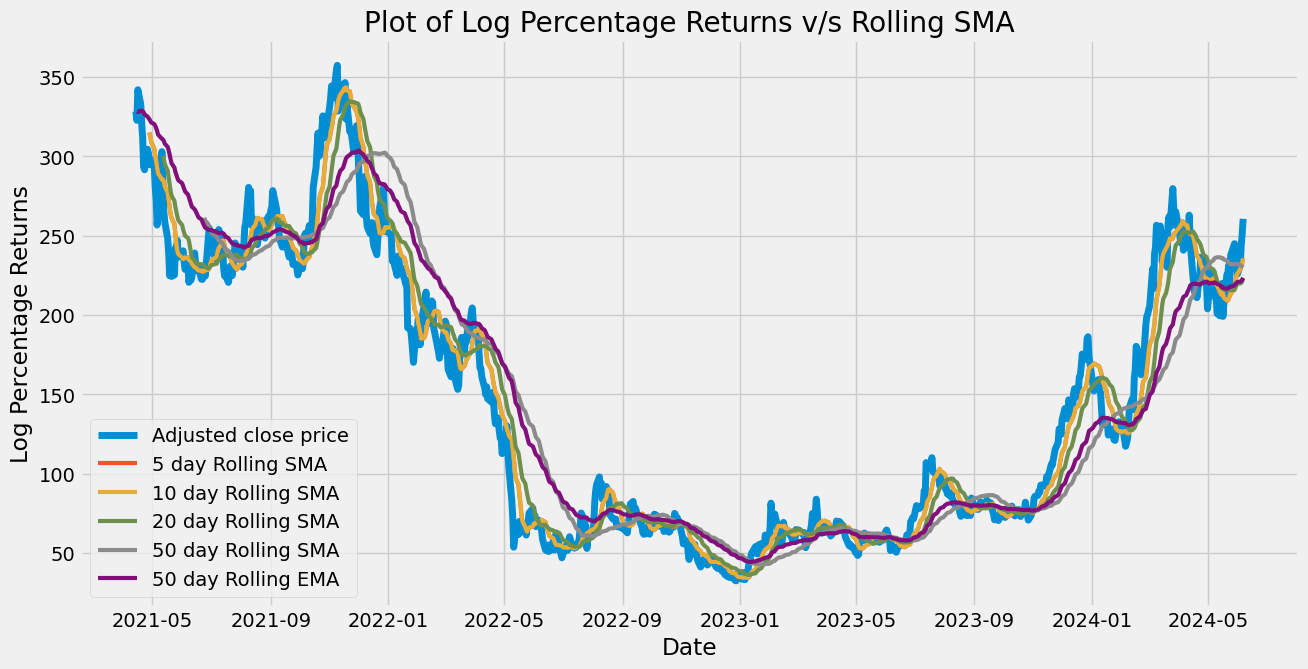

In [58]:
plt.figure(figsize = (14,7))

#Plotting 'Adj Close' Price and Rolling SMA lines
plt.plot(df['Adj Close'],label='Adjusted close price',linewidth=5)
plt.plot(df['SMA_5_1'],label='5 day Rolling SMA',linewidth=3)
plt.plot(df['SMA_10_1'],label='10 day Rolling SMA',linewidth=3)
plt.plot(df['SMA_20_1'],label='20 day Rolling SMA',linewidth=3)
plt.plot(df['SMA_50_1'],label='50 day Rolling SMA',linewidth=3)
plt.plot(df['EMA_50_1'],label='50 day Rolling EMA',linewidth=3)
plt.xlabel('Date')
plt.ylabel('Log Percentage Returns')
plt.title('Plot of Log Percentage Returns v/s Rolling SMA')
plt.legend()

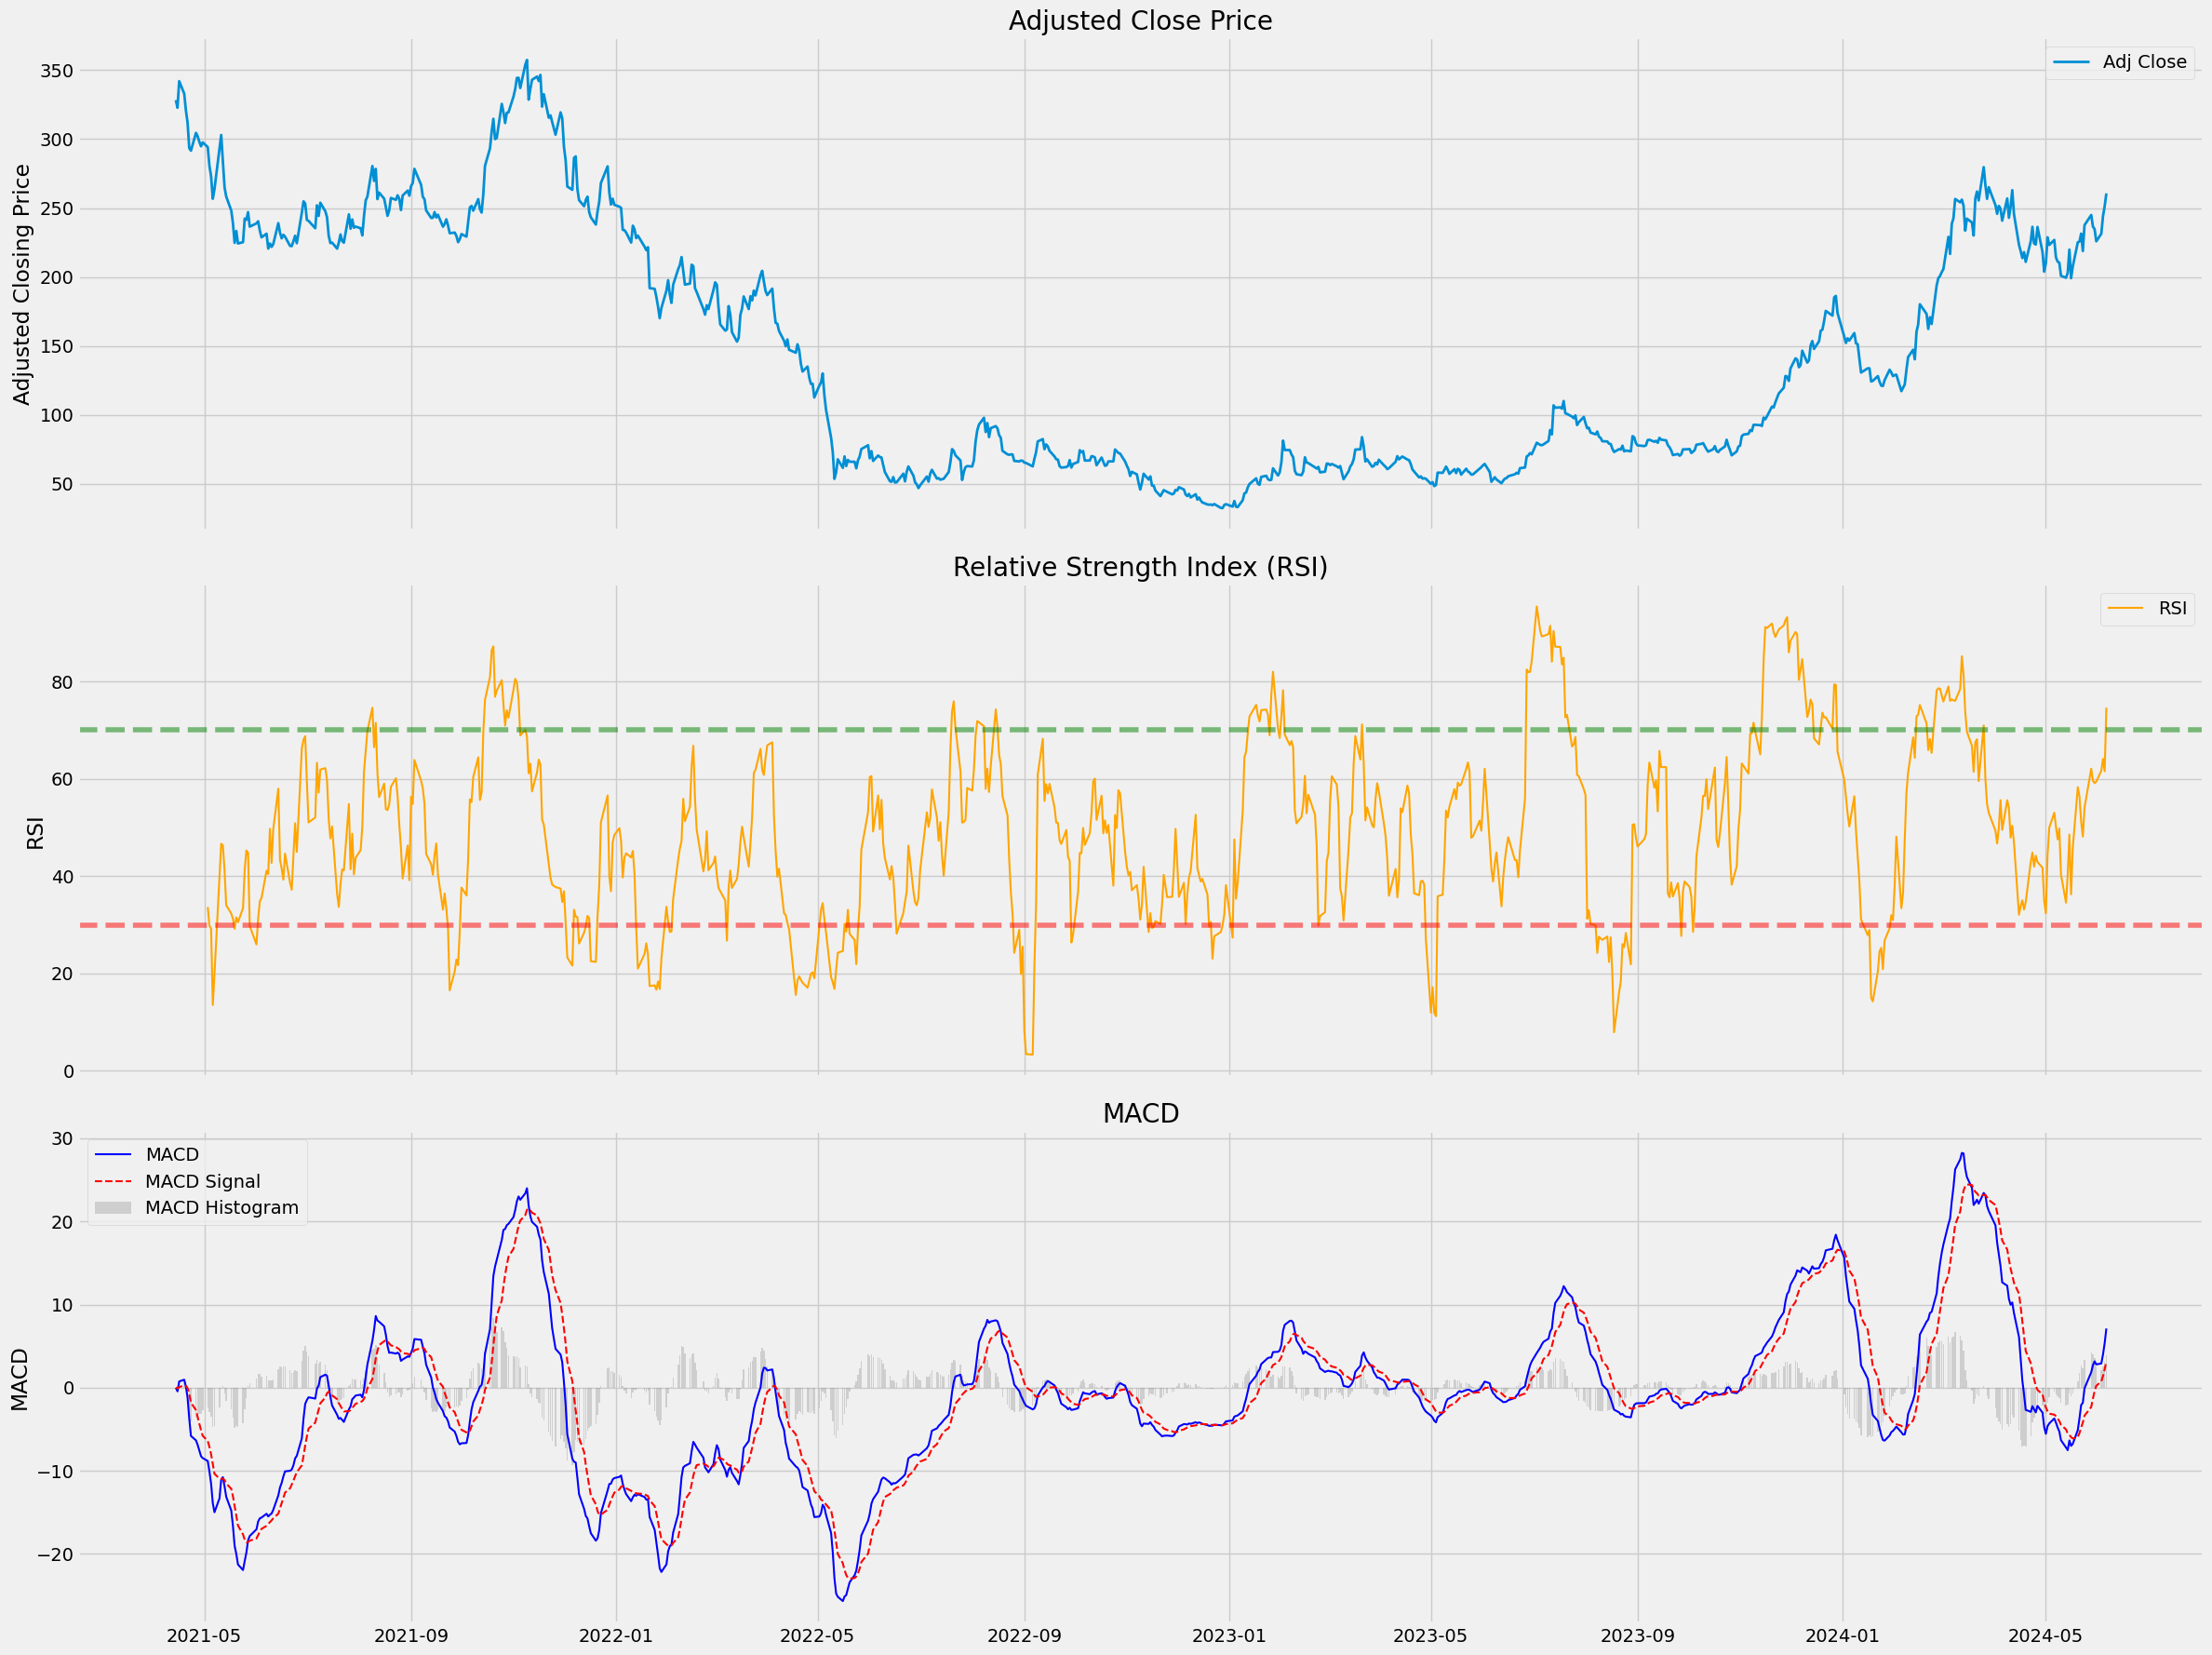

In [59]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(24, 18), sharex=True)

# Plotting Adjusted close price on the first subplot
ax1.plot(df['Adj Close'], label='Adj Close', linewidth=2)
ax1.set_title('Adjusted Close Price')
ax1.set_ylabel('Adjusted Closing Price')
ax1.legend()

# Plotting RSI on the second subplot
ax2.plot(df['RSI'], label='RSI', color='orange', linewidth=1.5)
ax2.set_title('Relative Strength Index (RSI)')
ax2.set_ylabel('RSI')
ax2.axhline(30, linestyle='--', alpha=0.5, color='red')
ax2.axhline(70, linestyle='--', alpha=0.5, color='green')
ax2.legend()

# Plotting MACD on the third subplot
ax3.plot(df['MACD'], label='MACD', color='blue', linewidth=1.5)
ax3.plot(df['MACD_signal'], label='MACD Signal', color='red', linestyle='--', linewidth=1.5)
ax3.bar(df.index, df['MACD_hist'], label='MACD Histogram', color='grey', alpha=0.3)
ax3.set_title('MACD')
ax3.set_ylabel('MACD')
ax3.legend()

plt.tight_layout()
plt.show()

## Linear Regression Model

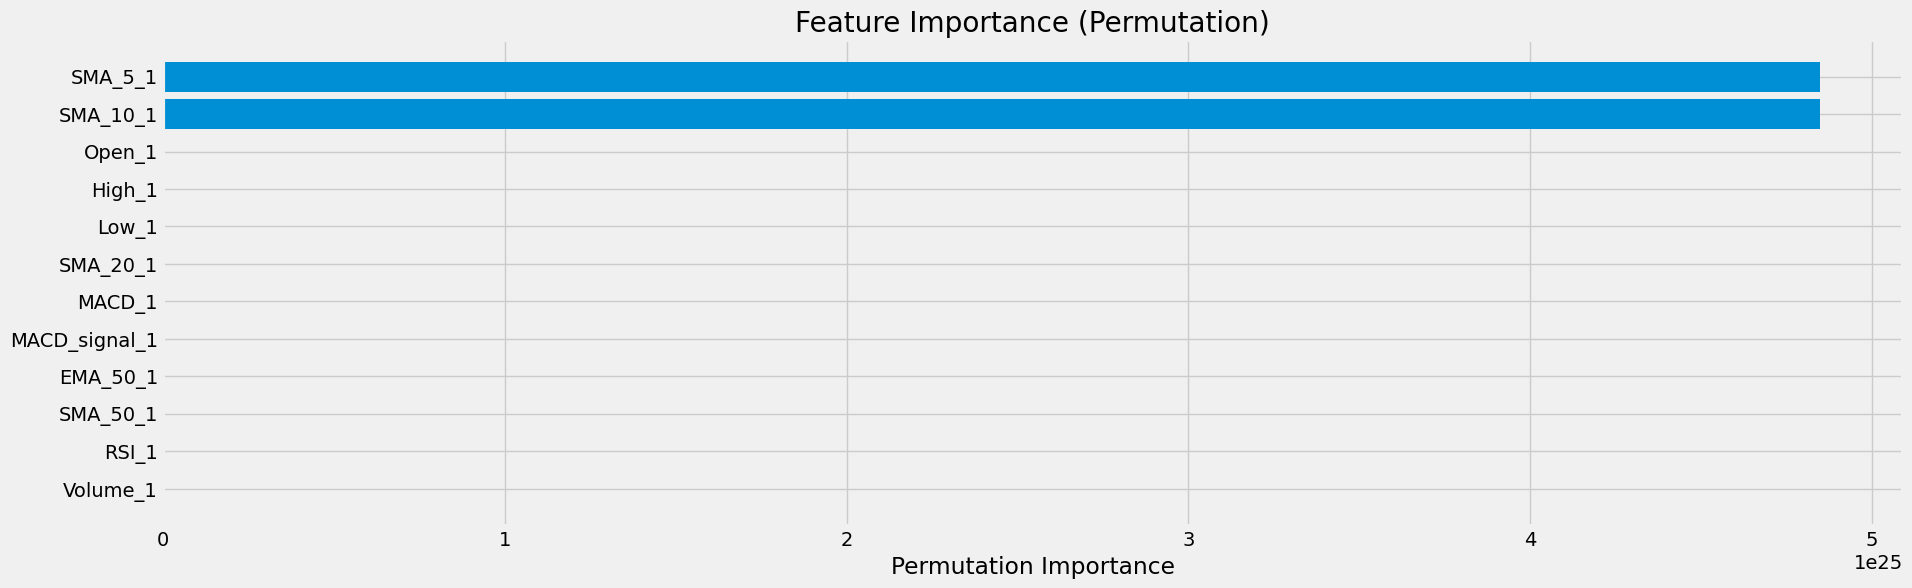

In [60]:
# Model training
features = ['SMA_5_1','SMA_10_1','SMA_20_1', 'SMA_50_1', 'EMA_50_1', 'RSI_1',
       'MACD_1', 'MACD_signal_1','Volume_1','Open_1', 'High_1','Low_1']
X = df[features].dropna()
y = df['Log_Pct_Returns_1'][X.index]

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting scaled features into dataframe
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Initialize linear regression model
model = LinearRegression()

model.fit(X_scaled, y)

# Calculate permutation importance
perm_importance = permutation_importance(model, X_scaled, y, n_repeats=30, random_state=42)

# Get feature names
feature_names = X.columns

# Sort feature importance
sorted_idx = perm_importance.importances_mean.argsort()

# Plot permutation importance
plt.figure(figsize=(20, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance (Permutation)')
plt.show()


In [61]:
# Model training
features = ['SMA_5_1','SMA_10_1','SMA_20_1', 'SMA_50_1', 'EMA_50_1', 'RSI_1',
       'MACD_1', 'MACD_signal_1','Volume_1','Open_1', 'High_1','Low_1']
X = df[features].dropna()
y = df['Log_Pct_Returns_1'][X.index]

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting scaled features into dataframe
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Initialize linear regression model
model = LinearRegression()

# Time series split for cross-validation
tscv = TimeSeriesSplit(n_splits=10)

# Metrics list to store scores for each fold
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []

# Perform cross-validation
for train_index, test_index in tscv.split(X_scaled):
    X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Calulate mean and standard deviation of the scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Print Results
print("TimeSeriesSplit Cross-Validation MSE:", mean_mse)
print("TimeSeriesSplit Cross-Validation MSE Std Dev:", std_mse)
print("TimeSeriesSplit Cross-Validation RMSE:", mean_rmse)
print("TimeSeriesSplit Cross-Validation RMSE Std Dev:", std_rmse)
print("TimeSeriesSplit Cross-Validation MAE:", mean_mae)
print("TimeSeriesSplit Cross-Validation MAE Std Dev:", std_mae)
print("TimeSeriesSplit Cross-Validation R2:", mean_r2)
print("TimeSeriesSplit Cross-Validation R2 Std Dev:", std_r2)


TimeSeriesSplit Cross-Validation MSE: 0.002115753621844927
TimeSeriesSplit Cross-Validation MSE Std Dev: 0.0014866216848947265
TimeSeriesSplit Cross-Validation RMSE: 0.04341000773069722
TimeSeriesSplit Cross-Validation RMSE Std Dev: 0.015209367201357694
TimeSeriesSplit Cross-Validation MAE: 0.03429066638584077
TimeSeriesSplit Cross-Validation MAE Std Dev: 0.011864266407084179
TimeSeriesSplit Cross-Validation R2: 0.42847899587754723
TimeSeriesSplit Cross-Validation R2 Std Dev: 0.13847127891249636


## Lasso Regression

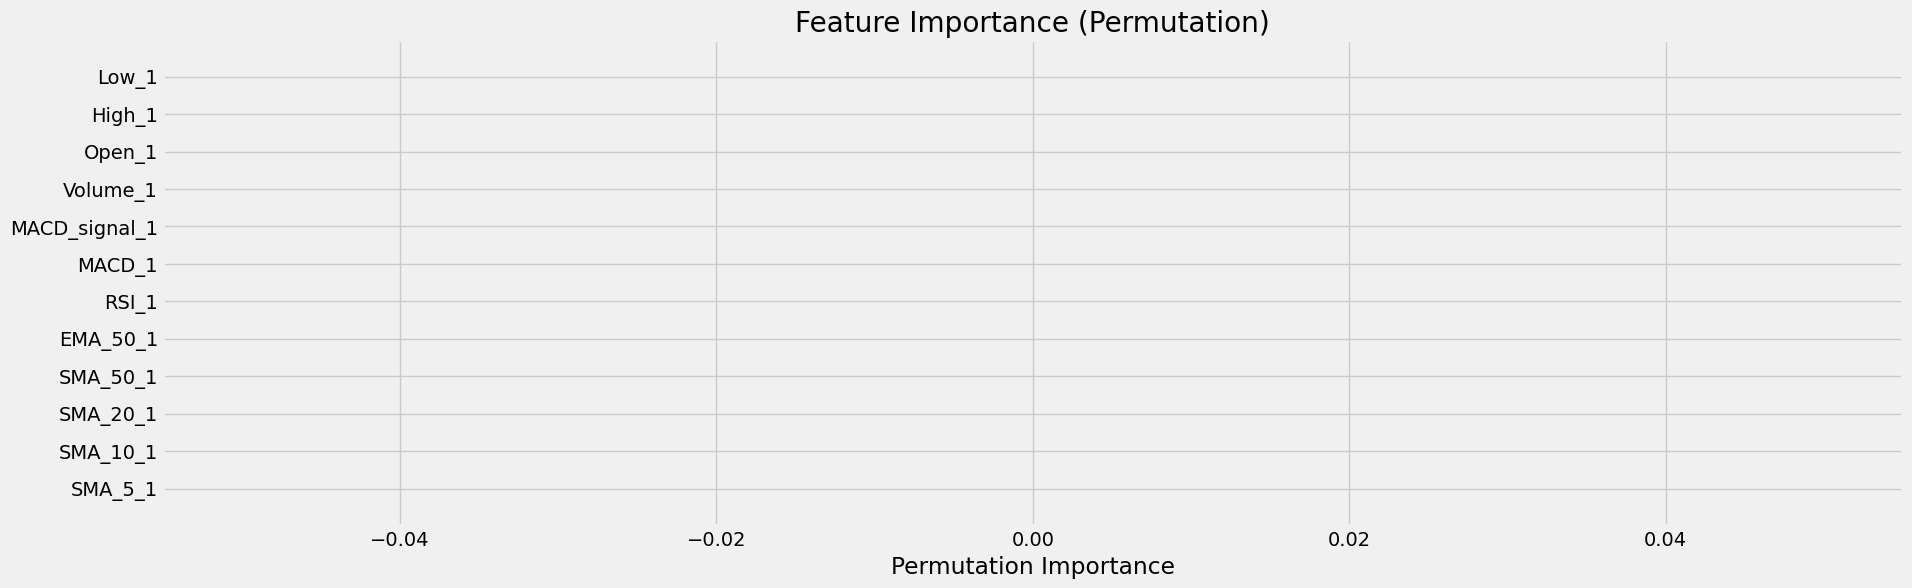

In [62]:
# Model training
features = ['SMA_5_1','SMA_10_1','SMA_20_1', 'SMA_50_1', 'EMA_50_1', 'RSI_1',
       'MACD_1', 'MACD_signal_1','Volume_1','Open_1', 'High_1','Low_1']
X = df[features].dropna()
y = df['Log_Pct_Returns_1'][X.index]

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting scaled features into dataframe
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Initialize linear regression model
model = Lasso()

model.fit(X_scaled, y)

# Calculate permutation importance
perm_importance = permutation_importance(model, X_scaled, y, n_repeats=30, random_state=42)

# Get feature names
feature_names = X.columns

# Sort feature importance
sorted_idx = perm_importance.importances_mean.argsort()

# Plot permutation importance
plt.figure(figsize=(20, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance (Permutation)')
plt.show()


In [63]:
# Model training
features = ['SMA_5_1','SMA_10_1','SMA_20_1', 'SMA_50_1', 'EMA_50_1', 'RSI_1',
       'MACD_1', 'MACD_signal_1','Volume_1','Open_1', 'High_1','Low_1']
X = df[features].dropna()
y = df['Log_Pct_Returns_1'][X.index]

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting scaled features into dataframe
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Initialize lasso regression model
model = Lasso()

# Time series split for cross-validation
tscv = TimeSeriesSplit(n_splits=10)

# Metrics list to store scores for each fold
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []

# Perform cross-validation
for train_index, test_index in tscv.split(X_scaled):
    X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Calulate mean and standard deviation of the scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Print Results
print("TimeSeriesSplit Cross-Validation MSE:", mean_mse)
print("TimeSeriesSplit Cross-Validation MSE Std Dev:", std_mse)
print("TimeSeriesSplit Cross-Validation RMSE:", mean_rmse)
print("TimeSeriesSplit Cross-Validation RMSE Std Dev:", std_rmse)
print("TimeSeriesSplit Cross-Validation MAE:", mean_mae)
print("TimeSeriesSplit Cross-Validation MAE Std Dev:", std_mae)
print("TimeSeriesSplit Cross-Validation R2:", mean_r2)
print("TimeSeriesSplit Cross-Validation R2 Std Dev:", std_r2)


TimeSeriesSplit Cross-Validation MSE: 0.003521726730946283
TimeSeriesSplit Cross-Validation MSE Std Dev: 0.0019403523019038648
TimeSeriesSplit Cross-Validation RMSE: 0.05731639136330553
TimeSeriesSplit Cross-Validation RMSE Std Dev: 0.015380442517518104
TimeSeriesSplit Cross-Validation MAE: 0.044867306230916615
TimeSeriesSplit Cross-Validation MAE Std Dev: 0.012677418128947938
TimeSeriesSplit Cross-Validation R2: -0.014317932279783752
TimeSeriesSplit Cross-Validation R2 Std Dev: 0.014961757213062934


## Ridge Regression

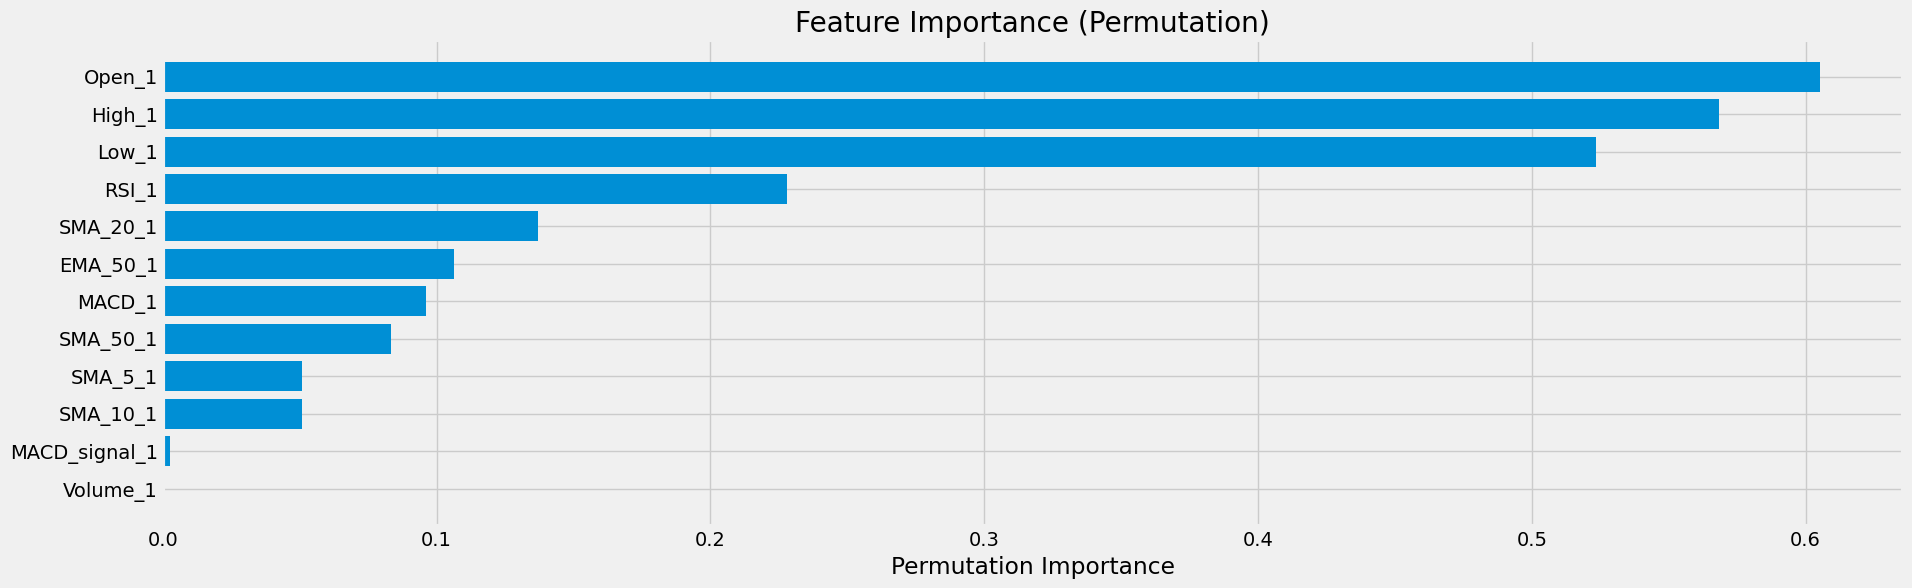

In [64]:
# Model training
features = ['SMA_5_1','SMA_10_1','SMA_20_1', 'SMA_50_1', 'EMA_50_1', 'RSI_1',
       'MACD_1', 'MACD_signal_1','Volume_1','Open_1', 'High_1','Low_1']
X = df[features].dropna()
y = df['Log_Pct_Returns_1'][X.index]

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting scaled features into dataframe
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Initialize linear regression model
model = Ridge()

model.fit(X_scaled, y)

# Calculate permutation importance
perm_importance = permutation_importance(model, X_scaled, y, n_repeats=30, random_state=42)

# Get feature names
feature_names = X.columns

# Sort feature importance
sorted_idx = perm_importance.importances_mean.argsort()

# Plot permutation importance
plt.figure(figsize=(20, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance (Permutation)')
plt.show()


In [65]:
# Model training
features = ['SMA_5_1', 'SMA_10_1', 'SMA_20_1', 'SMA_50_1', 'EMA_50_1', 'RSI_1',
       'MACD_1', 'Open_1', 'High_1', 'Low_1']
X = df[features].dropna()
y = df['Log_Pct_Returns_1'][X.index]

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting scaled features into dataframe
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Initialize lasso regression model
model = Ridge()

# Time series split for cross-validation
tscv = TimeSeriesSplit(n_splits=10)

# Metrics list to store scores for each fold
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []

# Perform cross-validation
for train_index, test_index in tscv.split(X_scaled):
    X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Calulate mean and standard deviation of the scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Print Results
print("TimeSeriesSplit Cross-Validation MSE:", mean_mse)
print("TimeSeriesSplit Cross-Validation MSE Std Dev:", std_mse)
print("TimeSeriesSplit Cross-Validation RMSE:", mean_rmse)
print("TimeSeriesSplit Cross-Validation RMSE Std Dev:", std_rmse)
print("TimeSeriesSplit Cross-Validation MAE:", mean_mae)
print("TimeSeriesSplit Cross-Validation MAE Std Dev:", std_mae)
print("TimeSeriesSplit Cross-Validation R2:", mean_r2)
print("TimeSeriesSplit Cross-Validation R2 Std Dev:", std_r2)


TimeSeriesSplit Cross-Validation MSE: 0.0031743225990841866
TimeSeriesSplit Cross-Validation MSE Std Dev: 0.0018351092026246132
TimeSeriesSplit Cross-Validation RMSE: 0.05424437968424434
TimeSeriesSplit Cross-Validation RMSE Std Dev: 0.015227273943675105
TimeSeriesSplit Cross-Validation MAE: 0.04344250108391359
TimeSeriesSplit Cross-Validation MAE Std Dev: 0.012406025308386918
TimeSeriesSplit Cross-Validation R2: 0.09463895406955075
TimeSeriesSplit Cross-Validation R2 Std Dev: 0.05923974703903605


## ElasticNet

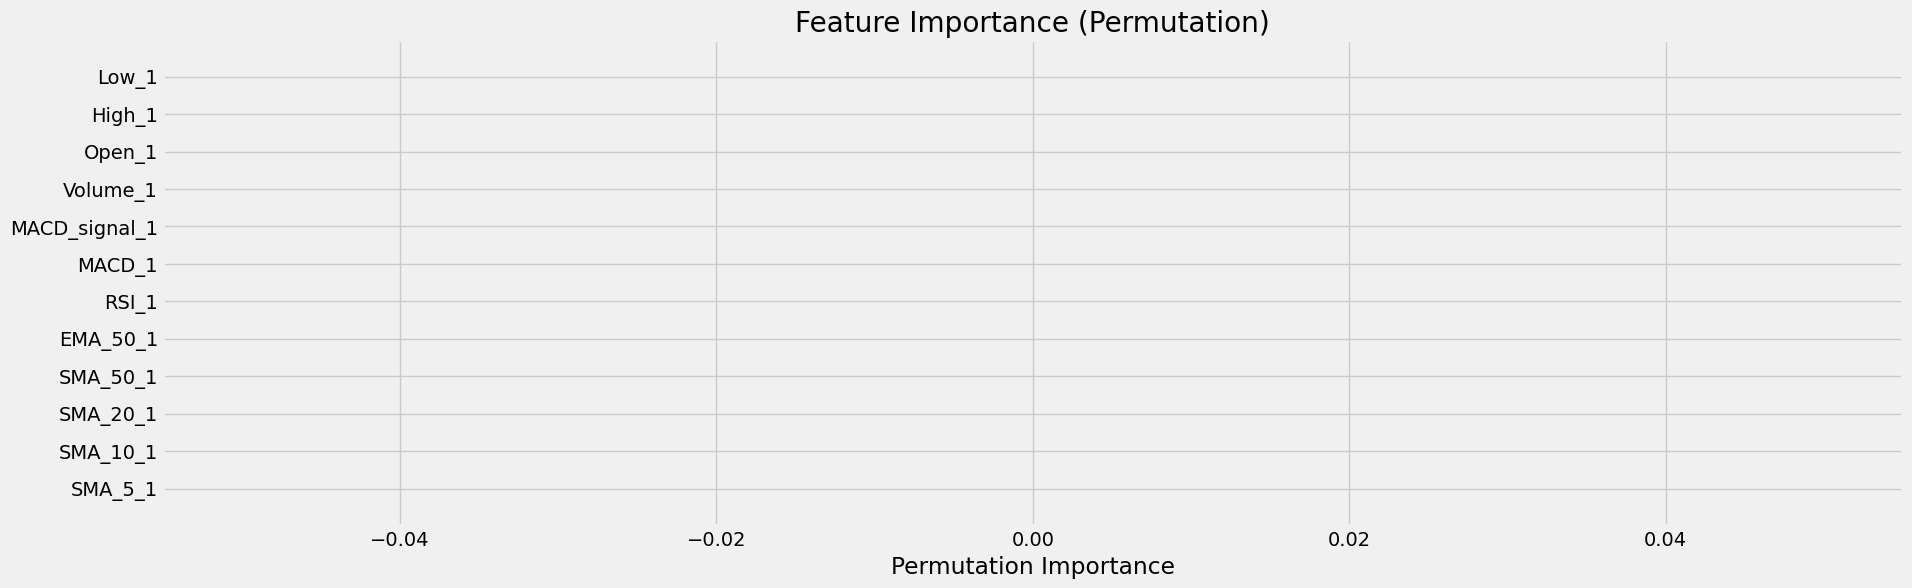

In [66]:
# Model training
features = ['SMA_5_1','SMA_10_1','SMA_20_1', 'SMA_50_1', 'EMA_50_1', 'RSI_1',
       'MACD_1', 'MACD_signal_1','Volume_1','Open_1', 'High_1','Low_1']
X = df[features].dropna()
y = df['Log_Pct_Returns_1'][X.index]

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting scaled features into dataframe
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Initialize linear regression model
model = ElasticNet()

model.fit(X_scaled, y)

# Calculate permutation importance
perm_importance = permutation_importance(model, X_scaled, y, n_repeats=30, random_state=42)

# Get feature names
feature_names = X.columns

# Sort feature importance
sorted_idx = perm_importance.importances_mean.argsort()

# Plot permutation importance
plt.figure(figsize=(20, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance (Permutation)')
plt.show()


In [67]:
# Model training
features = ['SMA_5_1', 'SMA_10_1', 'SMA_20_1', 'SMA_50_1', 'EMA_50_1', 'RSI_1',
       'MACD_1', 'MACD_signal_1','Volume_1', 'Open_1', 'High_1', 'Low_1']
X = df[features].dropna()
y = df['Log_Pct_Returns_1'][X.index]

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting scaled features into dataframe
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Initialize lasso regression model
model = ElasticNet()

# Time series split for cross-validation
tscv = TimeSeriesSplit(n_splits=10)

# Metrics list to store scores for each fold
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []

# Perform cross-validation
for train_index, test_index in tscv.split(X_scaled):
    X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Calulate mean and standard deviation of the scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Print Results
print("TimeSeriesSplit Cross-Validation MSE:", mean_mse)
print("TimeSeriesSplit Cross-Validation MSE Std Dev:", std_mse)
print("TimeSeriesSplit Cross-Validation RMSE:", mean_rmse)
print("TimeSeriesSplit Cross-Validation RMSE Std Dev:", std_rmse)
print("TimeSeriesSplit Cross-Validation MAE:", mean_mae)
print("TimeSeriesSplit Cross-Validation MAE Std Dev:", std_mae)
print("TimeSeriesSplit Cross-Validation R2:", mean_r2)
print("TimeSeriesSplit Cross-Validation R2 Std Dev:", std_r2)


TimeSeriesSplit Cross-Validation MSE: 0.003521726730946283
TimeSeriesSplit Cross-Validation MSE Std Dev: 0.0019403523019038648
TimeSeriesSplit Cross-Validation RMSE: 0.05731639136330553
TimeSeriesSplit Cross-Validation RMSE Std Dev: 0.015380442517518104
TimeSeriesSplit Cross-Validation MAE: 0.044867306230916615
TimeSeriesSplit Cross-Validation MAE Std Dev: 0.012677418128947938
TimeSeriesSplit Cross-Validation R2: -0.014317932279783752
TimeSeriesSplit Cross-Validation R2 Std Dev: 0.014961757213062934


## Random Forest

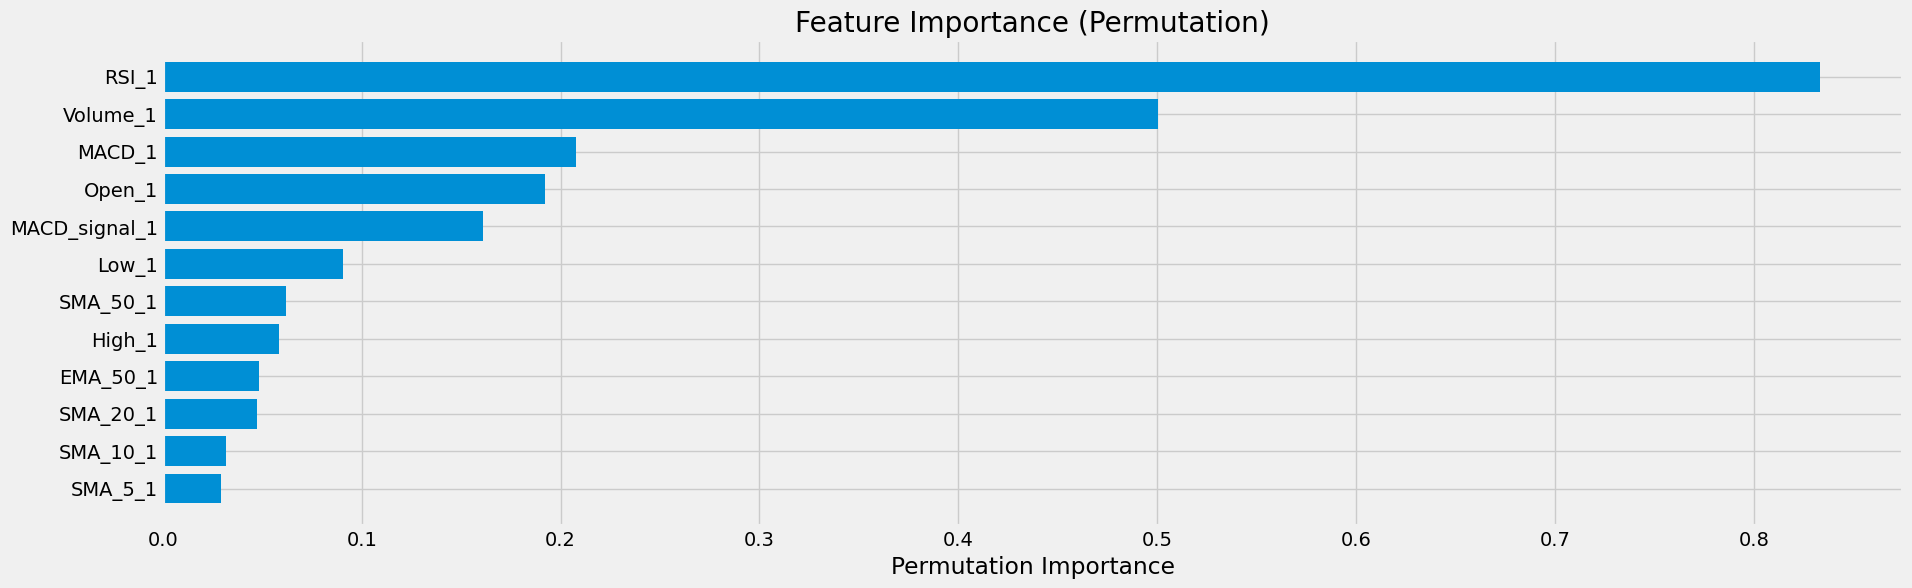

In [68]:
# Model training
features = ['SMA_5_1','SMA_10_1','SMA_20_1', 'SMA_50_1', 'EMA_50_1', 'RSI_1',
       'MACD_1', 'MACD_signal_1','Volume_1','Open_1', 'High_1','Low_1']
X = df[features].dropna()
y = df['Log_Pct_Returns_1'][X.index]

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting scaled features into dataframe
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Initialize linear regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_scaled, y)

# Calculate permutation importance
perm_importance = permutation_importance(model, X_scaled, y, n_repeats=30, random_state=42)

# Get feature names
feature_names = X.columns

# Sort feature importance
sorted_idx = perm_importance.importances_mean.argsort()

# Plot permutation importance
plt.figure(figsize=(20, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance (Permutation)')
plt.show()


In [69]:
# Model training
features = [  'RSI_1',
       'MACD_1', 'MACD_signal_1','Volume_1', 'Open_1','Low_1']
X = df[features].dropna()
y = df['Log_Pct_Returns_1'][X.index]

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting scaled features into dataframe
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Initialize lasso regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Time series split for cross-validation
tscv = TimeSeriesSplit(n_splits=10)

# Metrics list to store scores for each fold
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []

# Perform cross-validation
for train_index, test_index in tscv.split(X_scaled):
    X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Calulate mean and standard deviation of the scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Print Results
print("TimeSeriesSplit Cross-Validation MSE:", mean_mse)
print("TimeSeriesSplit Cross-Validation MSE Std Dev:", std_mse)
print("TimeSeriesSplit Cross-Validation RMSE:", mean_rmse)
print("TimeSeriesSplit Cross-Validation RMSE Std Dev:", std_rmse)
print("TimeSeriesSplit Cross-Validation MAE:", mean_mae)
print("TimeSeriesSplit Cross-Validation MAE Std Dev:", std_mae)
print("TimeSeriesSplit Cross-Validation R2:", mean_r2)
print("TimeSeriesSplit Cross-Validation R2 Std Dev:", std_r2)


TimeSeriesSplit Cross-Validation MSE: 0.0032897502075277542
TimeSeriesSplit Cross-Validation MSE Std Dev: 0.0017216884779713373
TimeSeriesSplit Cross-Validation RMSE: 0.055134209107739654
TimeSeriesSplit Cross-Validation RMSE Std Dev: 0.015810414086664306
TimeSeriesSplit Cross-Validation MAE: 0.042702895208238986
TimeSeriesSplit Cross-Validation MAE Std Dev: 0.01213109201284456
TimeSeriesSplit Cross-Validation R2: 0.033050368799364696
TimeSeriesSplit Cross-Validation R2 Std Dev: 0.08978889464029693


## Gradient Boost Regressor

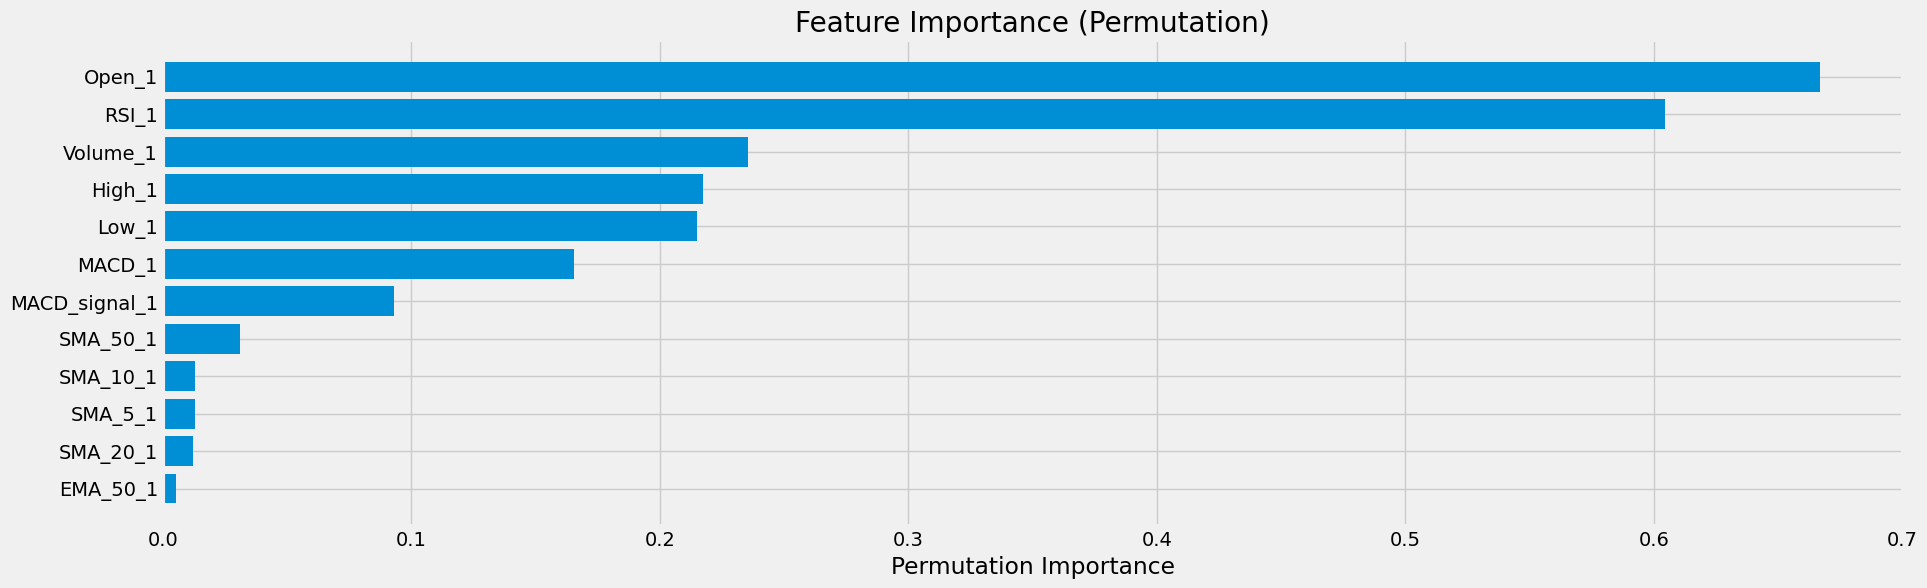

In [70]:
# Model training
features = ['SMA_5_1','SMA_10_1','SMA_20_1', 'SMA_50_1', 'EMA_50_1', 'RSI_1',
       'MACD_1', 'MACD_signal_1','Volume_1','Open_1', 'High_1','Low_1']
X = df[features].dropna()
y = df['Log_Pct_Returns_1'][X.index]

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting scaled features into dataframe
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Initialize linear regression model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

model.fit(X_scaled, y)

# Calculate permutation importance
perm_importance = permutation_importance(model, X_scaled, y, n_repeats=30, random_state=42)

# Get feature names
feature_names = X.columns

# Sort feature importance
sorted_idx = perm_importance.importances_mean.argsort()

# Plot permutation importance
plt.figure(figsize=(20, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance (Permutation)')
plt.show()


In [71]:
# Model training
features = [  'RSI_1',
       'MACD_1', 'Volume_1', 'Open_1', 'High_1', 'Low_1']
X = df[features].dropna()
y = df['Log_Pct_Returns_1'][X.index]

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting scaled features into dataframe
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Initialize lasso regression model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Time series split for cross-validation
tscv = TimeSeriesSplit(n_splits=10)

# Metrics list to store scores for each fold
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []

# Perform cross-validation
for train_index, test_index in tscv.split(X_scaled):
    X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Calulate mean and standard deviation of the scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Print Results
print("TimeSeriesSplit Cross-Validation MSE:", mean_mse)
print("TimeSeriesSplit Cross-Validation MSE Std Dev:", std_mse)
print("TimeSeriesSplit Cross-Validation RMSE:", mean_rmse)
print("TimeSeriesSplit Cross-Validation RMSE Std Dev:", std_rmse)
print("TimeSeriesSplit Cross-Validation MAE:", mean_mae)
print("TimeSeriesSplit Cross-Validation MAE Std Dev:", std_mae)
print("TimeSeriesSplit Cross-Validation R2:", mean_r2)
print("TimeSeriesSplit Cross-Validation R2 Std Dev:", std_r2)


TimeSeriesSplit Cross-Validation MSE: 0.0032409194306903958
TimeSeriesSplit Cross-Validation MSE Std Dev: 0.0017247307877534626
TimeSeriesSplit Cross-Validation RMSE: 0.054862556755112604
TimeSeriesSplit Cross-Validation RMSE Std Dev: 0.015199318964428773
TimeSeriesSplit Cross-Validation MAE: 0.042601286446845674
TimeSeriesSplit Cross-Validation MAE Std Dev: 0.011797490935005182
TimeSeriesSplit Cross-Validation R2: 0.032236470932581154
TimeSeriesSplit Cross-Validation R2 Std Dev: 0.06630162376012363


## Support Vector Regression

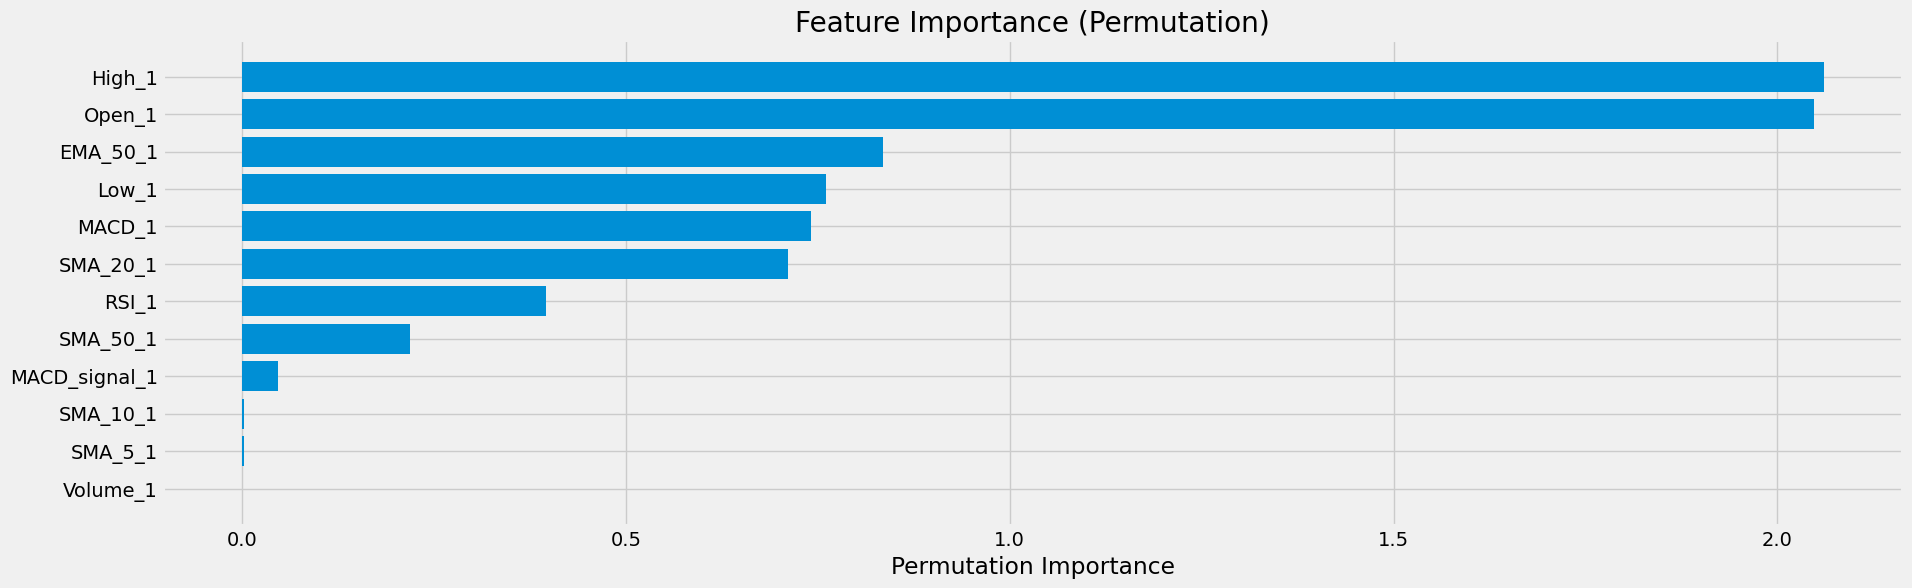

In [72]:
# Model training
features = ['SMA_5_1','SMA_10_1','SMA_20_1', 'SMA_50_1', 'EMA_50_1', 'RSI_1',
       'MACD_1', 'MACD_signal_1','Volume_1','Open_1', 'High_1','Low_1']
X = df[features].dropna()
y = df['Log_Pct_Returns_1'][X.index]

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting scaled features into dataframe
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Initialize linear regression model
model = SVR(kernel='linear')

model.fit(X_scaled, y)

# Calculate permutation importance
perm_importance = permutation_importance(model, X_scaled, y, n_repeats=30, random_state=42)

# Get feature names
feature_names = X.columns

# Sort feature importance
sorted_idx = perm_importance.importances_mean.argsort()

# Plot permutation importance
plt.figure(figsize=(20, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance (Permutation)')
plt.show()


In [73]:
# Model training
features = ['SMA_5_1', 'SMA_10_1', 'SMA_20_1', 'SMA_50_1', 'EMA_50_1', 'RSI_1',
       'MACD_1', 'MACD_signal_1', 'Open_1', 'High_1', 'Low_1']
X = df[features].dropna()
y = df['Log_Pct_Returns_1'][X.index]

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting scaled features into dataframe
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Initialize lasso regression model
model = SVR(kernel='linear')

# Time series split for cross-validation
tscv = TimeSeriesSplit(n_splits=10)

# Metrics list to store scores for each fold
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []

# Perform cross-validation
for train_index, test_index in tscv.split(X_scaled):
    X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Calulate mean and standard deviation of the scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Print Results
print("TimeSeriesSplit Cross-Validation MSE:", mean_mse)
print("TimeSeriesSplit Cross-Validation MSE Std Dev:", std_mse)
print("TimeSeriesSplit Cross-Validation RMSE:", mean_rmse)
print("TimeSeriesSplit Cross-Validation RMSE Std Dev:", std_rmse)
print("TimeSeriesSplit Cross-Validation MAE:", mean_mae)
print("TimeSeriesSplit Cross-Validation MAE Std Dev:", std_mae)
print("TimeSeriesSplit Cross-Validation R2:", mean_r2)
print("TimeSeriesSplit Cross-Validation R2 Std Dev:", std_r2)


TimeSeriesSplit Cross-Validation MSE: 0.003214510060379478
TimeSeriesSplit Cross-Validation MSE Std Dev: 0.0019503938967208622
TimeSeriesSplit Cross-Validation RMSE: 0.054516210197856255
TimeSeriesSplit Cross-Validation RMSE Std Dev: 0.015572183085316986
TimeSeriesSplit Cross-Validation MAE: 0.043790995084085606
TimeSeriesSplit Cross-Validation MAE Std Dev: 0.012812732688865756
TimeSeriesSplit Cross-Validation R2: 0.08147708665427468
TimeSeriesSplit Cross-Validation R2 Std Dev: 0.10050641061647443
